In [65]:
import matplotlib.pyplot as plt
import numpy as np
import sys,os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import importlib
importlib.reload(a3ut)
sys.path.append(os.getcwd()+'/A3lib')
from A3lib import utils as a3ut 

## 1. Prepare the XOR Dataset 

In [66]:

# XOR inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([[0], [1], [1], [0]])


## Model 4: one hidden layer with relu and one output layer with sigmoid activation

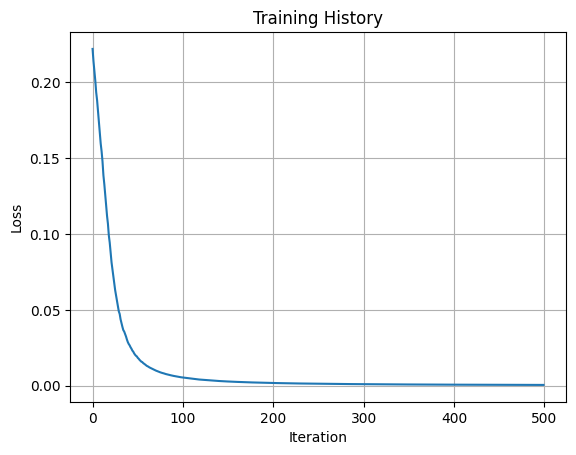

my_xor4(0, 0) = 0
my_xor4(0, 1) = 1
my_xor4(1, 0) = 1
my_xor4(1, 1) = 0
Accuracy: 1.0


In [67]:

# === Forward Pass ===
def forward(ws, x, n):
    z1 = a3ut.hidden_layer(ws, x, n)
    a1 = a3ut.relu(z1)
    w_out = ws[3*n:3*n+n].flatten()
    b_out = ws[3*n+n][0]
    z2 = np.dot(w_out, a1) + b_out
    a2 = a3ut.sigmoid(z2)
    return z1, a1, z2, a2

# === Backward Pass ===
def backward(ws, x, y, n):
    z1, a1, z2, a2 = forward(ws, x, n)
    grad = np.zeros_like(ws).flatten()

    # Output layer gradients
    dL_da2 = 2 * (a2 - y)
    dL_dz2 = dL_da2 * a3ut.d_sigmoid(z2)
    grad[3*n:3*n+n] += dL_dz2 * a1
    grad[3*n+n]     += dL_dz2.item()

    # Hidden layer gradients
    dL_da1 = dL_dz2 * ws[3*n:3*n+n].flatten()
    dL_dz1 = dL_da1 * a3ut.d_relu(z1)

    for i in range(n):
        i1 = 3*i
        i2 = i1 + 1
        i3 = i1 + 2
        grad[i1] += dL_dz1[i] * x[0]
        grad[i2] += dL_dz1[i] * x[1]
        grad[i3] += dL_dz1[i]

    return grad.reshape(-1, 1)

# === Update weights ===
def update_weights(ws, grad, lr):
    return ws - lr * grad

# === Train the model ===
def train(X, Y, n, epochs=500, lr=1.5, seed=42):
    ws = a3ut.init_ws(seed=seed, hidden_size=n)
    history = []
    for _ in range(epochs):
        total_grad = np.zeros_like(ws)
        for x, y in zip(X, Y):
            grad = backward(ws, x, y, n)
            total_grad += grad
        total_grad /= len(X)
        ws = update_weights(ws, total_grad, lr)
        loss = a3ut.mse(ws, lambda w, x: forward(w, x, n)[3], X, Y)
        history.append(loss)
    return ws, history

# === Prediction ===
def predict(ws, x, n):
    return round(forward(ws, x, n)[3])


n = 32
ws0 = a3ut.init_ws(seed=42, hidden_size=n)
train_ws, history = train(X, Y, n, epochs=500, lr=1.5, seed=42)

a3ut.plot_history(history)

my_xor4 = lambda x1, x2: round(forward(train_ws, [x1, x2], n)[3])

for x in X:
    print(f"my_xor4({x[0]}, {x[1]}) = {my_xor4(x[0], x[1])}")
acc = a3ut.accuracy(X, Y, my_xor4)
print("Accuracy:", acc)




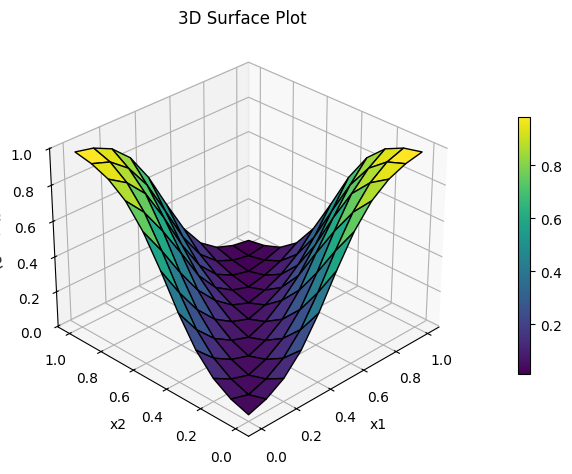

In [68]:
x = np.arange(0, 1.1, 0.1)
A, B = np.meshgrid(x, x)
f4= lambda x1, x2: forward(train_ws, [x1, x2], n)[3]
a3ut.plot3d_(
    lambda x1, x2: forward(train_ws, [x1, x2], n)[3],
    A, B)
plt.show()